# 75% train , 25% test

In [ ]:
# Gerekli kütüphanelerin ve modüllerin import edilmesi

# NumPy kütüphanesi, çok boyutlu dizilerle çalışmak için kullanılır
import numpy as np

# TensorFlow, derin öğrenme modelleri oluşturmak ve eğitmek için kullanılan bir kütüphanedir
import tensorflow as tf

# Sequential modeli, sıralı katmanlardan oluşan bir sinir ağı modeli oluşturmayı sağlar
from tensorflow.keras.models import Sequential

# Conv2D, MaxPooling2D, Flatten ve Dense katmanları, sinir ağı modelinde kullanılan farklı türde katmanları temsil eder
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ImageDataGenerator, görüntü verilerini artırma ve modele yüklemek için kullanılan bir modüldür
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# sklearn.metrics, çeşitli performans metrikleri ve değerlendirme yöntemlerini içerir
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# os modülü, işletim sistemiyle ilgili işlemleri gerçekleştirmek için kullanılır
import os


In [ ]:
# Google Colab'dan sürücüyü bağlama işlemi
from google.colab import drive
drive.mount('/gdrive')


print(os.listdir("/gdrive/My Drive/deep_learning/7525/Banana_Ripeness_Classification"))


Mounted at /gdrive
['traning', 'test']


In [ ]:
# Eğitim ve test veri yollarının belirlenmesi
train_path = "/gdrive/My Drive/deep_learning/7525/Banana_Ripeness_Classification/traning"
test_path = "/gdrive/My Drive/deep_learning/7525/Banana_Ripeness_Classification/test"
image_size = 100  # kais yaptı

In [ ]:
# Veri artırma (data augmentation) işlemi için ImageDataGenerator'ın oluşturulması
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Piksel değerlerini 0 ile 1 arasına ölçeklendirme
    shear_range=0.2,           # Kesme (shear) işlemi için açı aralığı
    zoom_range=0.2,            # Yakınlaştırma (zoom) aralığı
    horizontal_flip=True,      # Yatay düzlemde simetri oluşturma (flip)
    validation_split=0.1       # %10'u validation için ayrılacak
)

In [ ]:
# Test veri seti için bir ImageDataGenerator oluşturma
# `rescale=1./255` parametresi, piksel değerlerini 0 ile 1 arasında ölçeklendirir.
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Eğitim veri seti için ImageDataGenerator kullanarak veri yükleyici oluşturma
train_generator = train_datagen.flow_from_directory(
    train_path,                 # Eğitim verilerinin bulunduğu dizin
    target_size=(image_size, image_size), # Görüntülerin hedef boyutu (64x64 piksel)
    batch_size=32,              # Batch boyutu (her iterasyonda işlenecek örnek sayısı)
    class_mode='categorical',   # Sınıflandırma problemi olduğunu belirtir
    subset='training'           # 'training' alt kümesi, yani eğitim veri kümesi
)

Found 9100 images belonging to 4 classes.


In [ ]:
# Doğrulama veri seti için ImageDataGenerator kullanarak veri yükleyici oluşturma
validation_generator = train_datagen.flow_from_directory(
    train_path,                 # Verilerin bulunduğu dizin
    target_size=(image_size, image_size),       # Görüntülerin hedef boyutu (64x64 piksel)
    batch_size=32,              # Batch boyutu (her iterasyonda işlenecek örnek sayısı)
    class_mode='categorical',   # Sınıflandırma problemi olduğunu belirtir
    subset='validation'         # 'validation' alt kümesi, yani doğrulama veri kümesi
)

Found 1009 images belonging to 4 classes.


In [ ]:
# Test veri seti için ImageDataGenerator kullanarak veri yükleyici oluşturma
test_generator = test_datagen.flow_from_directory(
    test_path,                  # Test verilerinin bulunduğu dizin
    target_size=(image_size, image_size),       # Görüntülerin hedef boyutu (64x64 piksel)
    batch_size=32,              # Batch boyutu (her iterasyonda işlenecek örnek sayısı)
    class_mode='categorical'    # Sınıflandırma problemi olduğunu belirtir
)



Found 3369 images belonging to 4 classes.


**CallBack**


In [ ]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
]

# CNN MODELI

In [ ]:
# Evrişimli Sinir Ağı (CNN) modelinin oluşturulması
model = Sequential()

# Evrişim (Convolution) katmanı - 32 filtre, 3x3 filtre boyutu, giriş boyutu 64x64 piksel, ReLU aktivasyon fonksiyonu
model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3), activation='relu'))

# Havuzlama (Pooling) katmanı - 2x2 boyutunda max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bir evrişim ve bir havuzlama katmanının tekrarı (64 filtre ve 3x3 filtre boyutu)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bir evrişim ve bir havuzlama katmanının tekrarı (64 filtre ve 3x3 filtre boyutu)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bir evrişim ve bir havuzlama katmanının tekrarı (64 filtre ve 3x3 filtre boyutu)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Düzleştirme (Flatten) katmanı - verileri düzleştirerek tek boyutlu vektöre dönüştürme
model.add(Flatten())

# Yoğun (Dense) katman - 128 nöron, ReLU aktivasyon fonksiyonu
model.add(Dense(128, activation='relu'))

# Dropout katmanı - aşırı uyumu azaltmak için %30'u bırakma
model.add(Dropout(0.3))

# Çıkış katmanı - 4 sınıf için softmax aktivasyon fonksiyonu (overripe, ripe, rotten, unripe)
model.add(Dense(4, activation='softmax'))


# 4 sınıf var: overripe, ripe, rotten, unripe

In [ ]:
# Modelin derlenmesi (compile edilmesi)
model.compile(
    optimizer='adam',                 # Optimizasyon algoritması olarak Adam kullanılır
    loss='categorical_crossentropy',  # Çoklu sınıflandırma problemleri için çapraz entropi kaybı kullanılır
    metrics=['accuracy']              # Modelin performansını izlemek için doğruluk (accuracy) metriği kullanılır
)

In [ ]:
# Modelin eğitimi
history_cnn = model.fit(
    train_generator,                        # Eğitim veri yükleyicisi
    epochs=50,                              # Eğitim epoch (iterasyon) sayısı
    callbacks=callback_list,
    validation_data=validation_generator    # Doğrulama veri yükleyicisi
)


Epoch 1/50
285/285 [==============================] - ETA: 0s - loss: 0.7440 - accuracy: 0.6867
Epoch 1: val_accuracy improved from -inf to 0.57284, saving model to model.h5
285/285 [==============================] - 1969s 7s/step - loss: 0.7440 - accuracy: 0.6867 - val_loss: 1.1182 - val_accuracy: 0.5728
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


285/285 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8526
Epoch 2: val_accuracy improved from 0.57284 to 0.63528, saving model to model.h5
285/285 [==============================] - 52s 181ms/step - loss: 0.3908 - accuracy: 0.8526 - val_loss: 0.9425 - val_accuracy: 0.6353
Epoch 3/50
285/285 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.8816
Epoch 3: val_accuracy improved from 0.63528 to 0.72052, saving model to model.h5
285/285 [==============================] - 52s 182ms/step - loss: 0.3298 - accuracy: 0.8816 - val_loss: 0.5738 - val_accuracy: 0.7205
Epoch 4/50
285/285 [==============================] - ETA: 0s - loss: 0.2627 - accuracy: 0.9040
Epoch 4: val_accuracy improved from 0.72052 to 0.73241, saving model to model.h5
285/285 [==============================] - 57s 200ms/step - loss: 0.2627 - accuracy: 0.9040 - val_loss: 0.8192 - val_accuracy: 0.7324
Epoch 5/50
285/285 [==============================] - ETA: 0s - loss: 0.2257 -

In [ ]:
# CNN modelinin performansını değerlendirme
test_predictions_cnn = model.predict(test_generator)            # Test verileri üzerinde tahminler yapılır
test_predictions_cnn = np.argmax(test_predictions_cnn, axis=1)  # Tahmin edilen sınıfların indeksleri alınır
test_true_labels_cnn = test_generator.classes                   # Gerçek test verisi sınıfları alınır

106/106 [==============================] - 786s 7s/step


In [ ]:
# CNN modeli performansını değerlendirme için kullanılan metrikler ve raporların hesaplanması

# Modelin doğruluk (accuracy) değeri hesaplanır
accuracy_cnn = accuracy_score(test_true_labels_cnn, test_predictions_cnn)

# Modelin hassasiyet (precision) değeri hesaplanır
precision_cnn = precision_score(test_true_labels_cnn, test_predictions_cnn, average='weighted')

# Modelin duyarlılık (recall) değeri hesaplanır
recall_cnn = recall_score(test_true_labels_cnn, test_predictions_cnn, average='weighted')

# F1 skoru hesaplanır (hassasiyet ve duyarlılık arasındaki dengeleyici ölçü)
f1_cnn = f1_score(test_true_labels_cnn, test_predictions_cnn, average='weighted')

# Karışıklık matrisi (confusion matrix) hesaplanır (sınıflandırma performansının detaylı göstergesi)
conf_matrix_cnn = confusion_matrix(test_true_labels_cnn, test_predictions_cnn)

# Sınıflandırma raporu (classification report) oluşturulur
# Her sınıf için hassasiyet, duyarlılık, F1 skoru ve destek (support) değerleri içerir
class_report_cnn = classification_report(test_true_labels_cnn, test_predictions_cnn)

# Transfer Learning Algorithim

In [ ]:
# Transfer Learning (Transfer Öğrenme) için MobileNetV2 modeli ve GlobalAveragePooling2D katmanının eklenmesi
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D  # GlobalAveragePooling2D katmanının eklenmesi


In [ ]:
# InceptionV3 modelini yükleme
base_model = InceptionV3(
    weights='imagenet',         # ImageNet veri kümesinde önceden eğitilmiş ağırlıkların kullanılması
    include_top=False,          # Üst katmanların (fully connected layers) dahil edilmemesi
    input_shape=(image_size  , image_size, 3)   # Giriş şeklinin (input shape) 299x299 piksel boyutunda ve 3 renk kanalı (RGB) olarak ayarlanması
)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Transfer Learning modelinin oluşturulması
model_tl = Sequential()

# MobileNetV2 modelinin eklenmesi
model_tl.add(base_model)

# GlobalAveragePooling2D katmanının eklenmesi
model_tl.add(GlobalAveragePooling2D())

# Yoğun (Dense) katmanın eklenmesi - 128 nöron ve ReLU aktivasyon fonksiyonu
model_tl.add(Dense(128, activation='relu'))

# Dropout katmanı eklenmesi - aşırı uyumu azaltmak için %30'u bırakma
model_tl.add(Dropout(0.3))

# Çıkış katmanı eklenmesi - 4 sınıf için softmax aktivasyon fonksiyonu
model_tl.add(Dense(4, activation='softmax'))


In [ ]:
# MobileNetV2 modelinin katmanlarını dondurma
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Transfer öğrenme modelinin derlenmesi
model_tl.compile(
    optimizer='adam',                 # Optimizasyon algoritması olarak Adam kullanılır
    loss='categorical_crossentropy',  # Çoklu sınıflandırma problemleri için çapraz entropi kaybı kullanılır
    metrics=['accuracy']              # Modelin performansını izlemek için doğruluk (accuracy) metriği kullanılır
)

In [ ]:
# Transfer Learning Modeli Eğitme
history_tl = model_tl.fit(train_generator, epochs=50, validation_data=validation_generator , callbacks=callback_list)

Epoch 1/50
285/285 [==============================] - ETA: 0s - loss: 0.5572 - accuracy: 0.8077
Epoch 1: val_accuracy improved from 0.79881 to 0.80476, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


285/285 [==============================] - 65s 205ms/step - loss: 0.5572 - accuracy: 0.8077 - val_loss: 0.5304 - val_accuracy: 0.8048
Epoch 2/50
285/285 [==============================] - ETA: 0s - loss: 0.3692 - accuracy: 0.8636
Epoch 2: val_accuracy did not improve from 0.80476
285/285 [==============================] - 55s 194ms/step - loss: 0.3692 - accuracy: 0.8636 - val_loss: 0.6453 - val_accuracy: 0.7810
Epoch 3/50
285/285 [==============================] - ETA: 0s - loss: 0.3229 - accuracy: 0.8849
Epoch 3: val_accuracy improved from 0.80476 to 0.82854, saving model to model.h5
285/285 [==============================] - 55s 194ms/step - loss: 0.3229 - accuracy: 0.8849 - val_loss: 0.4908 - val_accuracy: 0.8285
Epoch 4/50
285/285 [==============================] - ETA: 0s - loss: 0.3011 - accuracy: 0.8887
Epoch 4: val_accuracy improved from 0.82854 to 0.83746, saving model to model.h5
285/285 [==============================] - 58s 202ms/step - loss: 0.3011 - accuracy: 0.8887 - val

In [ ]:
# Transfer öğrenme modelinin performansını değerlendirme
test_predictions_tl = model_tl.predict(test_generator)        # Test verileri üzerinde tahminler yapılır
test_predictions_tl = np.argmax(test_predictions_tl, axis=1)  # Tahmin edilen sınıfların indeksleri alınır
test_true_labels_tl = test_generator.classes                  # Gerçek test verisi sınıfları alınır

106/106 [==============================] - 15s 130ms/step


In [ ]:
# Transfer öğrenme modeli için hesaplanan metrikler
accuracy_tl = accuracy_score(test_true_labels_tl, test_predictions_tl)                        # Doğruluk metriği
precision_tl = precision_score(test_true_labels_tl, test_predictions_tl, average='weighted')  # Hassasiyet metriği
recall_tl = recall_score(test_true_labels_tl, test_predictions_tl, average='weighted')        # Duyarlılık (recall) metriği
f1_tl = f1_score(test_true_labels_tl, test_predictions_tl, average='weighted')                # F1 skoru metriği
conf_matrix_tl = confusion_matrix(test_true_labels_tl, test_predictions_tl)                   # Karışıklık matrisi
class_report_tl = classification_report(test_true_labels_tl, test_predictions_tl)             # Sınıflandırma raporu

# Yapay Sinir Ağı

In [ ]:
# Yapay Sinir Ağı (Artificial Neural Network - ANN) modelinin oluşturulması
model_ann = Sequential()

# Giriş katmanı olarak görüntülerin düzleştirilmesi
model_ann.add(Flatten(input_shape=(image_size, image_size, 3)))

# Yoğun (Dense) katmanın eklenmesi - 128 nöron ve ReLU aktivasyon fonksiyonu
model_ann.add(Dense(128, activation='relu'))

# Dropout katmanı eklenmesi - aşırı uyumu azaltmak için %30'u bırakma
model_ann.add(Dropout(0.3))

# Çıkış katmanı eklenmesi - 4 sınıf için softmax aktivasyon fonksiyonu
model_ann.add(Dense(4, activation='softmax'))

In [ ]:
# Yapay Sinir Ağı (Artificial Neural Network - ANN) modelinin derlenmesi
model_ann.compile(
    optimizer='adam',                 # Optimizasyon algoritması olarak Adam kullanılır
    loss='categorical_crossentropy',  # Çoklu sınıflandırma problemleri için çapraz entropi kaybı kullanılır
    metrics=['accuracy']              # Modelin performansını izlemek için doğruluk (accuracy) metriği kullanılır
)


In [ ]:
# Yapay Sinir Ağı Modeli Eğitme
history_ann = model_ann.fit(train_generator, epochs=50, validation_data=validation_generator ,callbacks=callback_list)

Epoch 1/50
285/285 [==============================] - ETA: 0s - loss: 1.3638 - accuracy: 0.3610
Epoch 1: val_accuracy did not improve from 0.88503
285/285 [==============================] - 53s 186ms/step - loss: 1.3638 - accuracy: 0.3610 - val_loss: 1.3937 - val_accuracy: 0.2924
Epoch 2/50
285/285 [==============================] - ETA: 0s - loss: 1.3392 - accuracy: 0.3851
Epoch 2: val_accuracy did not improve from 0.88503
285/285 [==============================] - 51s 177ms/step - loss: 1.3392 - accuracy: 0.3851 - val_loss: 1.3574 - val_accuracy: 0.3221
Epoch 3/50
285/285 [==============================] - ETA: 0s - loss: 1.3256 - accuracy: 0.3705
Epoch 3: val_accuracy did not improve from 0.88503
285/285 [==============================] - 53s 188ms/step - loss: 1.3256 - accuracy: 0.3705 - val_loss: 1.3439 - val_accuracy: 0.3360
Epoch 4/50
285/285 [==============================] - ETA: 0s - loss: 1.3099 - accuracy: 0.3920
Epoch 4: val_accuracy did not improve from 0.88503
285/285 [=

In [ ]:
test_loss_ann, test_accuracy_ann = model_ann.evaluate(test_generator)  # Test veri seti üzerinde modelin kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar

106/106 [==============================] - 8s 79ms/step - loss: 1.2734 - accuracy: 0.4752


In [ ]:
# Yapay Sinir Ağı (Artificial Neural Network - ANN) modelinin performansını değerlendirme
predictions_ann = model_ann.predict(test_generator)                             # Test veri seti üzerinde tahminler yapar
y_pred_ann = [tf.argmax(prediction).numpy() for prediction in predictions_ann]  # Tahmin edilen sınıfların indekslerini alır
y_true_ann = test_generator.classes                                             # Gerçek test verisi sınıflarını alır


106/106 [==============================] - 9s 84ms/step


In [ ]:
# Yapay Sinir Ağı (Artificial Neural Network - ANN) modeli için hesaplanan metrikler
accuracy_ann = accuracy_score(y_true_ann, y_pred_ann)                         # Doğruluk metriği
precision_ann = precision_score(y_true_ann, y_pred_ann, average='weighted')   # Hassasiyet metriği
recall_ann = recall_score(y_true_ann, y_pred_ann, average='weighted')         # Duyarlılık (recall) metriği
f1_ann = f1_score(y_true_ann, y_pred_ann, average='weighted')                 # F1 skoru metriği
conf_matrix_ann = confusion_matrix(y_true_ann, y_pred_ann)                    # Karışıklık matrisi
class_report_ann = classification_report(y_true_ann, y_pred_ann)              # Sınıflandırma raporu


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

# SONUÇLAR

CNN Modeli Performansı:
Test Accuracy: 0.26031463342238054
Precision: 0.25744911219616073
Recall: 0.26031463342238054
F1 Score: 0.25866327175807113
Confusion Matrix:
[[129 192 257 126]
 [164 291 364 153]
 [226 299 357 202]
 [130 191 188 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.18      0.19       704
           1       0.30      0.30      0.30       972
           2       0.31      0.33      0.32      1084
           3       0.17      0.16      0.17       609

    accuracy                           0.26      3369
   macro avg       0.24      0.24      0.24      3369
weighted avg       0.26      0.26      0.26      3369



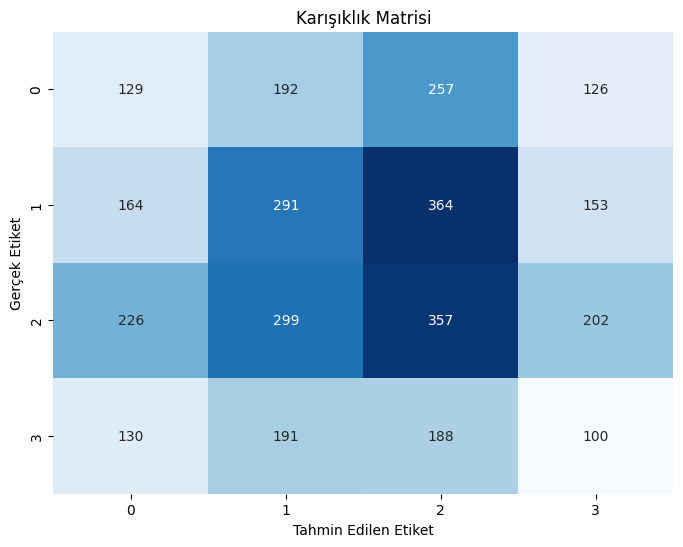

In [ ]:
# CNN Modeli Performansı'nın ekrana yazdırılması
print("CNN Modeli Performansı:")
print(f"Test Accuracy: {accuracy_cnn}")   # Test doğruluğunu ekrana yazdırır
print(f"Precision: {precision_cnn}")      # Hassasiyet (Precision) değerini ekrana yazdırır
print(f"Recall: {recall_cnn}")            # Duyarlılık (Recall) değerini ekrana yazdırır
print(f"F1 Score: {f1_cnn}")              # F1 Skoru'nu ekrana yazdırır

print("Confusion Matrix:")                # Karışıklık Matrisi'ni ekrana yazdırmak için
print(conf_matrix_cnn)                    # Karışıklık Matrisi'ni ekrana yazdırır

print("Classification Report:")           # Sınıflandırma Raporu'nu ekrana yazdırmak için
print(class_report_cnn)                   # Sınıflandırma Raporu'nu ekrana yazdırır

# plt işlemleri
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')

plt.show()



Transfer Learning Modeli Performansı:
Test Accuracy: 0.2736717126743841
Precision: 0.27292382112224806
Recall: 0.2736717126743841
F1 Score: 0.27324281132457023
Confusion Matrix:
[[153 214 209 128]
 [178 307 311 176]
 [216 320 353 195]
 [125 167 208 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.22      0.22       704
           1       0.30      0.32      0.31       972
           2       0.33      0.33      0.33      1084
           3       0.18      0.18      0.18       609

    accuracy                           0.27      3369
   macro avg       0.26      0.26      0.26      3369
weighted avg       0.27      0.27      0.27      3369



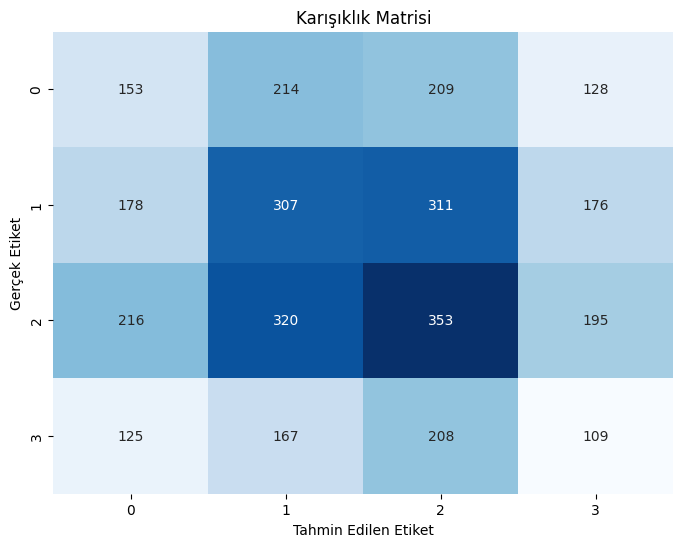

In [ ]:
# Transfer Learning Modeli Performansı'nın ekrana yazdırılması
print("\nTransfer Learning Modeli Performansı:")
print(f"Test Accuracy: {accuracy_tl}")    # Test doğruluğunu ekrana yazdırır
print(f"Precision: {precision_tl}")       # Hassasiyet (Precision) değerini ekrana yazdırır
print(f"Recall: {recall_tl}")             # Duyarlılık (Recall) değerini ekrana yazdırır
print(f"F1 Score: {f1_tl}")               # F1 Skoru'nu ekrana yazdırır

print("Confusion Matrix:")                # Karışıklık Matrisi'ni ekrana yazdırmak için
print(conf_matrix_tl)                     # Karışıklık Matrisi'ni ekrana yazdırır

print("Classification Report:")           # Sınıflandırma Raporu'nu ekrana yazdırmak için
print(class_report_tl)                    # Sınıflandırma Raporu'nu ekrana yazdırır

# plt işlemleri

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tl, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')

plt.show()



Yapay Sinir Ağı Modeli Performansı:
Test Accuracy: 0.31522707034728403
Precision: 0.19072797840307776
Recall: 0.31522707034728403
F1 Score: 0.23653468860206375
Confusion Matrix:
[[  0 302 402   0]
 [  0 396 576   0]
 [  0 418 666   0]
 [  0 238 371   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       704
           1       0.29      0.41      0.34       972
           2       0.33      0.61      0.43      1084
           3       0.00      0.00      0.00       609

    accuracy                           0.32      3369
   macro avg       0.16      0.26      0.19      3369
weighted avg       0.19      0.32      0.24      3369



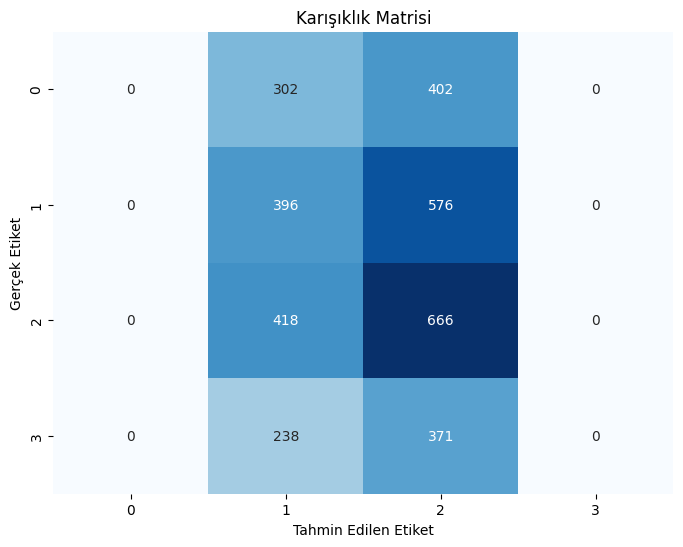

In [ ]:
# Yapay Sinir Ağı Modeli Performansı'nın ekrana yazdırılması
print("\nYapay Sinir Ağı Modeli Performansı:")
print(f"Test Accuracy: {accuracy_ann}")   # Test doğruluğunu ekrana yazdırır
print(f"Precision: {precision_ann}")      # Hassasiyet (Precision) değerini ekrana yazdırır
print(f"Recall: {recall_ann}")            # Duyarlılık (Recall) değerini ekrana yazdırır
print(f"F1 Score: {f1_ann}")              # F1 Skoru'nu ekrana yazdırır

print("Confusion Matrix:")                # Karışıklık Matrisi'ni ekrana yazdırmak için
print(conf_matrix_ann)                    # Karışıklık Matrisi'ni ekrana yazdırır

print("Classification Report:")           # Sınıflandırma Raporu'nu ekrana yazdırmak için
print(class_report_ann)                   # Sınıflandırma Raporu'nu ekrana yazdırır


# plt işlemleri

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')

plt.show()
